# Folger Passage 2023 - Cast vs Mount Data

In [1]:
# !pip install --upgrade pip
# !pip install onc

In [2]:
import onc
import mount_helpers as mount_functions
import cast_helpers as cast_functions
import pandas as pd

import os

from dotenv import load_dotenv
load_dotenv()
token = os.getenv("ONC_TOKEN")

## Longterm Mount Data - 2023

### 1. Define parameters

In [3]:
# TODO: make this always based on input?

In [4]:
# Time frame
start_23 = "2023-01-01T00:00:00.000Z"
start_24 = "2024-01-01T00:00:00.000Z"

# Properties available at Folger Deep and Pinnacle
deep_properties = ["oxygen", "salinity", "seawatertemperature", "sigmat"]
pinnacle_properties = ["oxygen", "parphotonbased", "chlorophyll", "salinity", "turbidityntu", "seawatertemperature", "sigmat"]

# Location Codes for Deep and Pinnacle
deep_locationCode = "FGPD"
pinnacle_locationCode = "FGPPN"

# Resample (necessary for time series greater than 1 day)
resample = 1800

### 2. Request data from API and create data frame

In [5]:
deep_yr_23_indicators = mount_functions.get_multi_property_dataframe(start=start_23, end=start_24, locationCode=deep_locationCode, propertyCodes=deep_properties, resample=resample)

{'dateFrom': '2023-01-01T00:00:00.000Z',
 'dateTo': '2024-01-01T00:00:00.000Z',
 'deviceCategoryCode': 'OXYSENSOR',
 'locationCode': 'FGPD.O2',
 'metadata': 'minimum',
 'method': 'getByLocation',
 'propertyCode': 'oxygen',
 'qualityControl': 'clean',
 'resamplePeriod': 1800,
 'resampleType': 'avg',
 'sensorCategoryCodes': 'oxygen_corrected'},
there are several warning messages:
* Warning: The requested resampling period '1800 second(s)' from Sun Jan 01 00:00:00 UTC 2023 to Mon Jan 01 00:00:00 UTC 2024 is less than this locations's maximum sampling interval '4800.0 second(s)', NaN filling will occur.

{'dateFrom': '2023-01-01T00:00:00.000Z',
 'dateTo': '2024-01-01T00:00:00.000Z',
 'deviceCategoryCode': 'CTD',
 'locationCode': 'FGPD',
 'metadata': 'minimum',
 'method': 'getByLocation',
 'propertyCode': 'salinity',
 'qualityControl': 'clean',
 'resamplePeriod': 1800,
 'resampleType': 'avg'},
there are several warning messages:
* Warning: The requested resampling period '1800 second(s)' fr

In [6]:
pin_yr_23_indicators = mount_functions.get_multi_property_dataframe(start=start_23, end=start_24, locationCode=pinnacle_locationCode, propertyCodes=pinnacle_properties, resample=resample)

### 3. Plot

In [7]:
# TODO: fix labels and spacing, choose parameters?
# TODO: deep doesnt have data for the first half of 2023, i could plot 2022 instead?

/Users/catherinebertozzi/jupyter-practice/deepnote/mount_helpers.py:480: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 2.
  shared_xticks = axes[0].get_xticks()
/Users/catherinebertozzi/jupyter-practice/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 2.
  fig.canvas.print_figure(bytes_io, **kw)


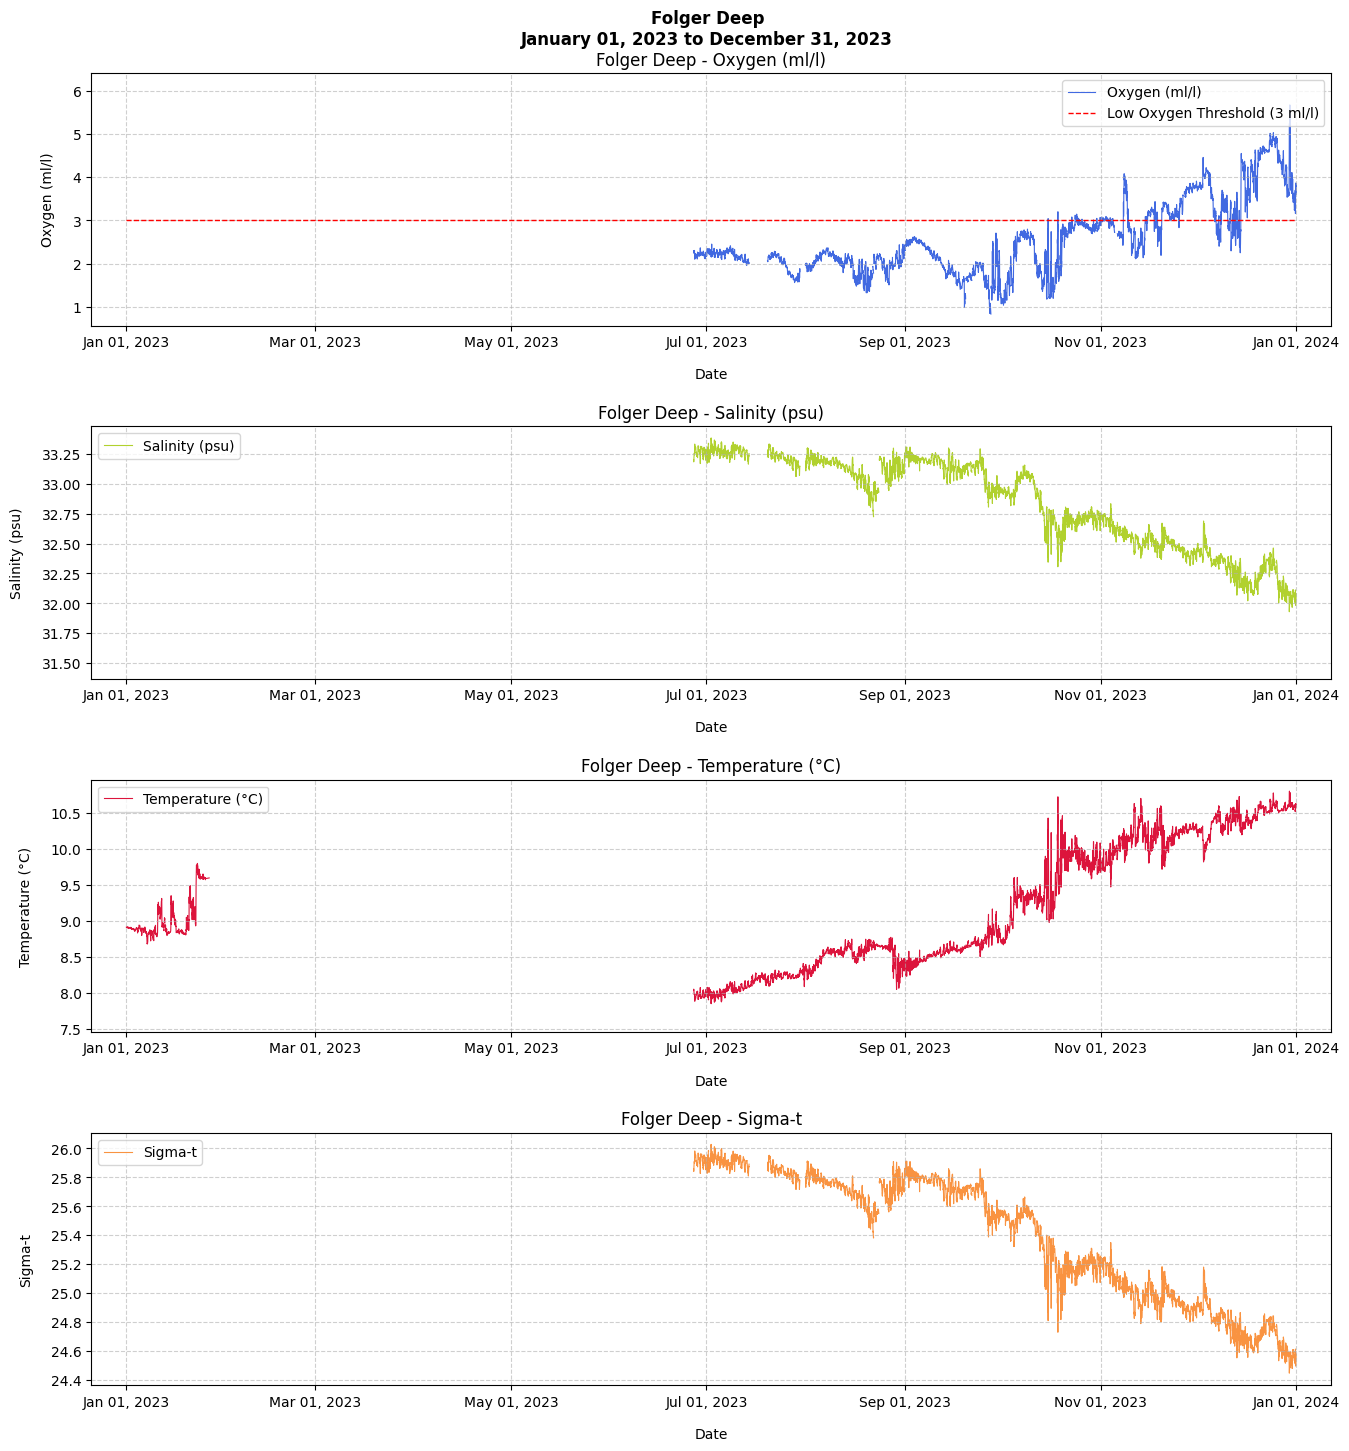

In [8]:
mount_functions.subplot_all_with_time(df=deep_yr_23_indicators, locationCode= "FGPD")

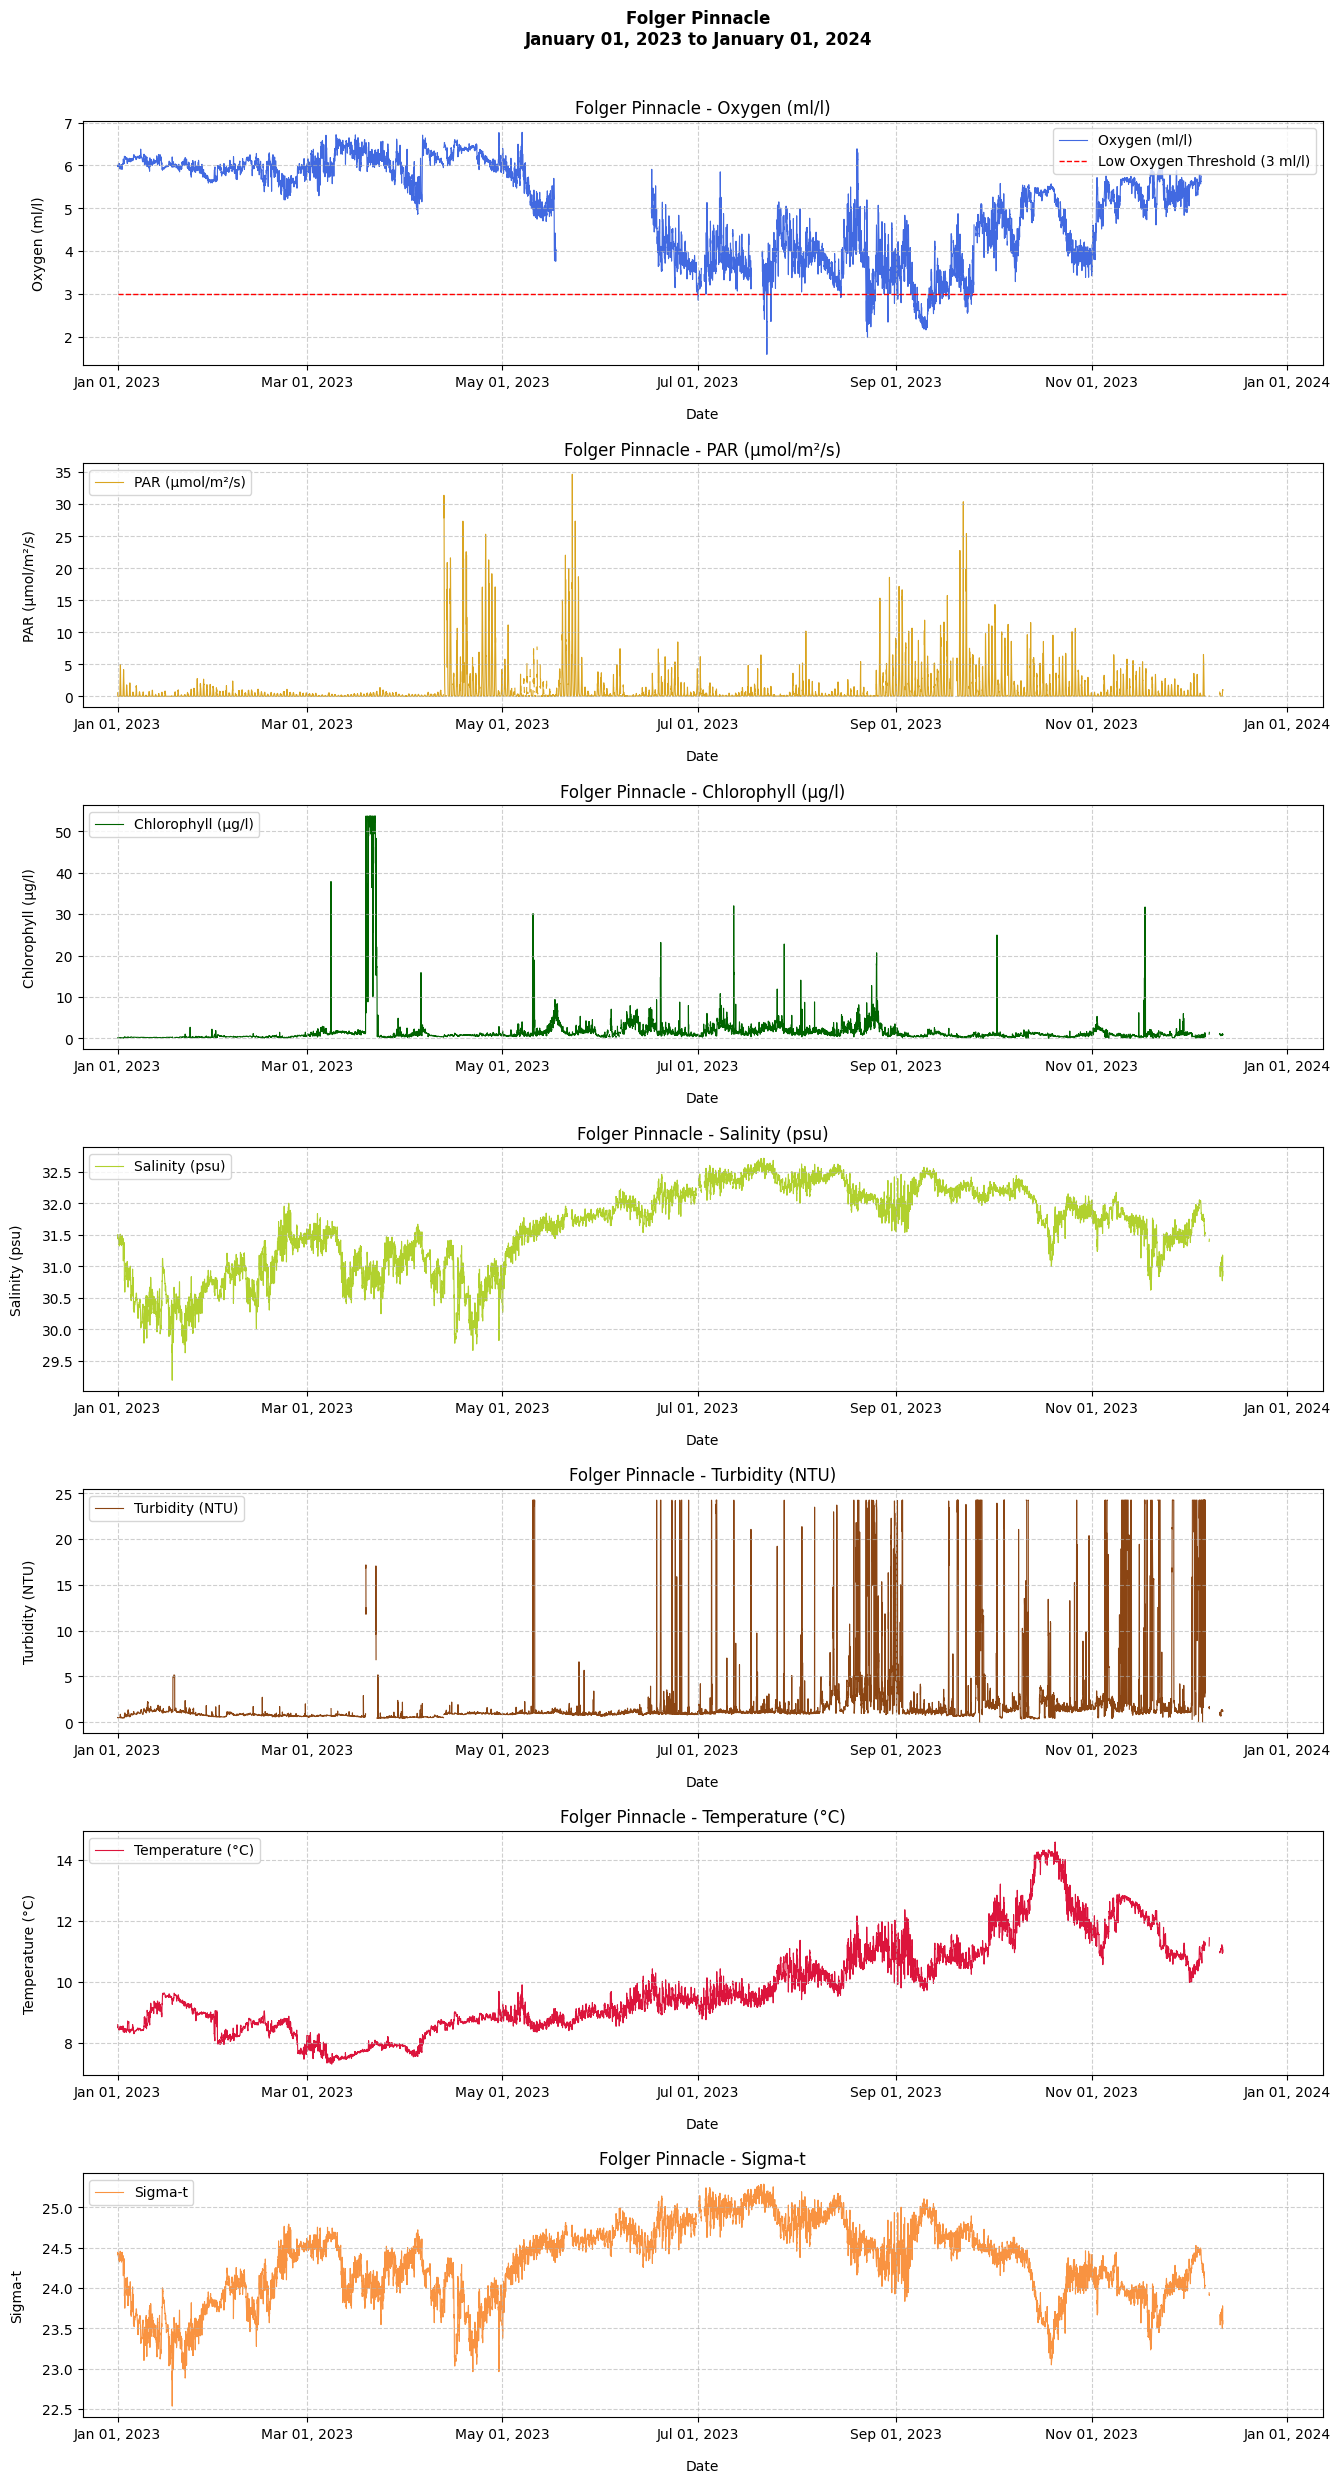

In [9]:
mount_functions.subplot_all_with_time(df=pin_yr_23_indicators, locationCode= "FGPPN", start=pd.to_datetime(start_23), end= pd.to_datetime(start_24))

## Comparing Cast vs Mount Data - July 2023

> NOTE: We know that there were casts at Folger Pinnacle and Folger Deep between 17:00 and 23:00 on July 11, 2023 from exploration using the Plotting Utility on Oceans 3.0.

## Folger Pinnacle

### 1. Define parameters

In [10]:
# Time
p_start = "2023-07-11T17:12:00.000Z"
p_end = "2023-07-11T20:16:00.000Z"

# Properties
cast_properties = ["oxygen", "chlorophyll", "salinity", "conductivity", "seawatertemperature", "density", "depth"]

# Location
pinnacle_locationCode = "FGPPN"

### 2. Request data and create a data frame

We need to request data from the mount at Pinnacle as well as the casts.

In [11]:
p_mount_df = mount_functions.get_multi_property_dataframe(start=p_start, end=p_end, locationCode="FGPPN", propertyCodes=["oxygen", "chlorophyll", "salinity", "conductivity", "seawatertemperature", "density"])

Error retrieving conductivity: 'conductivity'


In [12]:
p_cast_df = cast_functions.get_multi_property_dataframe(start=p_start, end=p_end, locationCode="CF341", propertyCodes=cast_properties)

### 3. Plot - Temperature

We can now plot the data from both the mount and the casts throughout the duration of each cast.

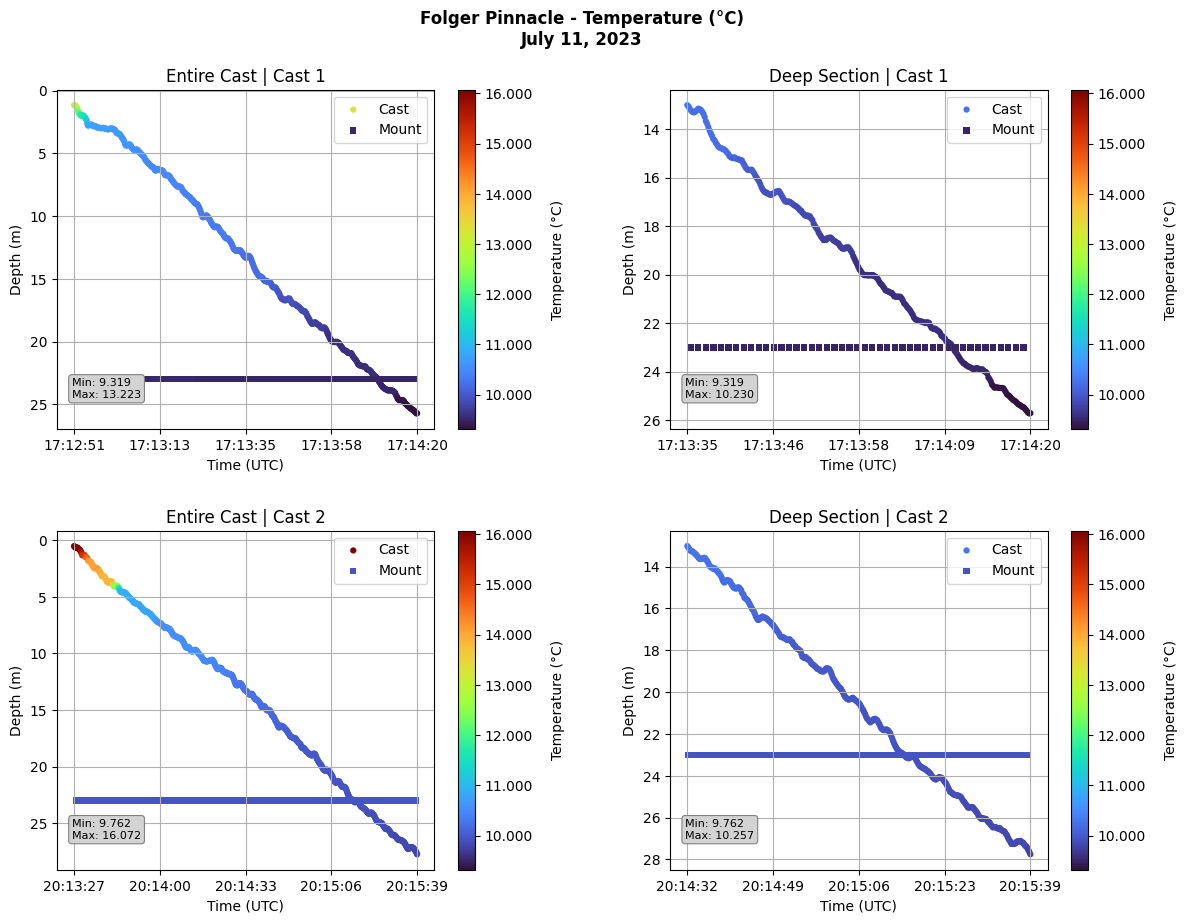

In [13]:
cast_functions.subplot_cast_and_mount_property(dataframes=[p_mount_df,p_cast_df], locationCode="FGPPN", propertyCode="seawatertemperature")

## Folger Deep

### 1. Define parameters

In [14]:
# Time
d_start = "2023-07-11T22:02:00.000Z"
d_end = "2023-07-11T22:09:00.000Z"

# Properties
d_properties = ["oxygen", "chlorophyll", "salinity", "seawatertemperature", "sigmat"]

# Location
deep_locationCode = "FGPD"

### 2. Request data and create data frame

In [15]:
d_mount_df = mount_functions.get_multi_property_dataframe(start=d_start, end=d_end, locationCode="FGPD", propertyCodes= ["oxygen", "salinity", "conductivity", "seawatertemperature", "density"])

Error retrieving conductivity: 'conductivity'


In [16]:
d_cast_df = cast_functions.get_multi_property_dataframe(start=d_start, end=d_end, locationCode="CF340", propertyCodes= cast_properties)

### 3. Plot - Temperature

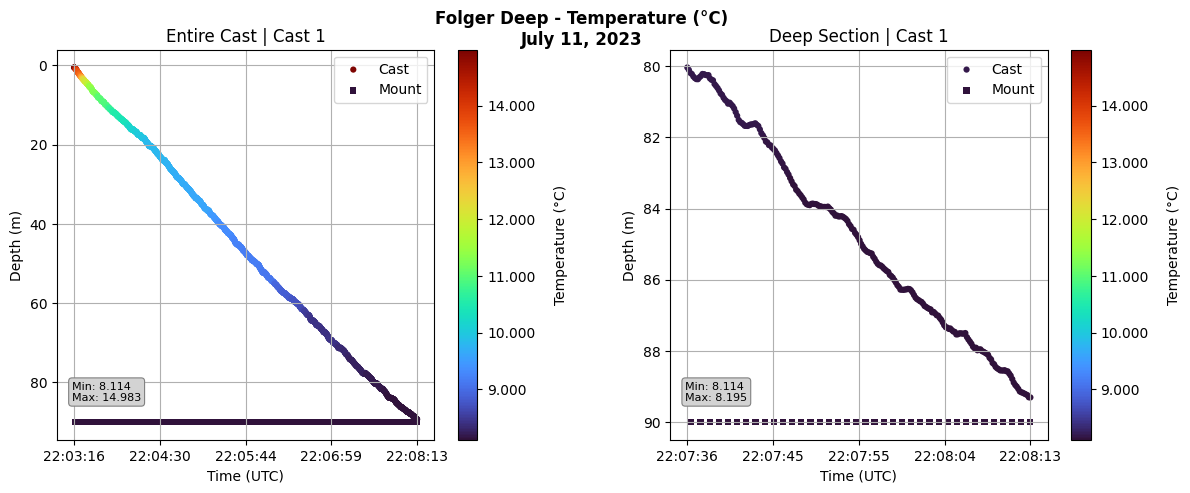

In [17]:
cast_functions.subplot_cast_and_mount_property(dataframes=[d_mount_df,d_cast_df], locationCode="FGPD", propertyCode="seawatertemperature")

# TODO: fix for other props

In [18]:
# cast_functions.subplot_cast_and_mount_property(dataframes=[d_mount_df,d_cast_df], locationCode="FGPD", propertyCode="oxygen")

In [19]:
# cast_functions.subplot_cast_and_mount_property(dataframes=[p_mount_df,p_cast_df], locationCode="FGPPN", propertyCode="oxygen")

In [20]:
# p_cast_df

In [21]:
# cast_ints = cast_functions.detect_cast_intervals(df=p_cast_df)
# print(cast_ints)

# deep_ints = cast_functions.detect_deep_intervals(df=p_cast_df, locationCode="FGPPN")
# print(deep_ints)

# info = cast_functions.get_cast_info(cast_df=p_cast_df, locationCode="FGGPN")
# print(info)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cd2cd01-70e8-41b6-af2d-f797c6675dbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>